<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Modelling: Machine Learning**
## Linear Regression

####Predicting medical expenses using linear regression 
The goal of this analysis is to use patient data to estimate the average medical
care expenses.
<br> insurance.csv file contains simulated dataset containing hypothetical medical expenses for patients in the United States.

First read data in the file into a dataframe object.

In [ ]:
import pandas as pd

In [ ]:
#Dataset import
url='https://drive.google.com/file/d/11jDe832Huw1Bwj1oTyYrXtn5DpkblFuD/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path) 

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
len(data)

1338

The dataset includes 1,338 examples of beneficiaries currently enrolled in the insurance plan, with features indicating characteristics of the patient as well as the total medical expenses charged to the plan for the calendar year.
The features are:
<br>
>**age:** An integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government). \\
>**sex:** The policy holder's gender, either male or female. \\
>**bmi:** The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9. \\
>**children:** An integer indicating the number of children/dependents covered by the insurance plan. \\
>**smoker:** A yes or no categorical variable that indicates whether the insured regularly smokes tobacco. \\
>**region:** The beneficiary's place of residence in the US, divided into four geographic regions: northeast, southeast, southwest, or northwest.

## Exploring and preparing the data 

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


>Because the mean value is greater than the median, this implies that the distribution of insurance expenses is right-skewed. \\
>This can be confirmed visually using a histogram:

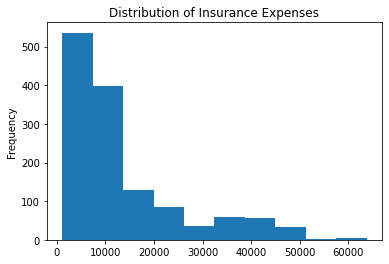

In [ ]:
data.charges.plot.hist(title='Distribution of Insurance Expenses' )

>As expected, the  figure shows a right-skewed distribution. 

 >It also shows that the majority of people in our data have yearly medical expenses between zero and $15,000, in spite of the fact that the tail of the distribution extends far past these peaks. 

##  Exploring relationships among features – the correlation matrix

>Before fitting a regression model to data, it can be useful to determine how the independent variables are related to the dependent variable and each other.

>A correlation matrix provides a quick overview of these relationships.

>Given a set of variables, it provides a correlation for each pairwise relationship.

>To create a correlation matrix for the four numeric variables in the insurance data, dataframe.corr() function is used. \\
>The correlation coefficients are bounded to the range -1 and 1. \\
>Two features have a perfect positive correlation if r =1, no correlation if r = 0 , and a perfect negative correlation if r = −1 , respectively. \\
>Pandas.corr() function supports different correlation algorithm, the default one is Pearson's correlation coefficient. \\
>It can be can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator). \\

\\[r = \frac{\sum_{i=1}^n \left[ \left(x^{(i)} - \mu_x \right) \left(y^{(i)} - \mu_y \right)\right] }{\sqrt{\sum_{i=1}^n \left(x^{(i)} - \mu_x \right)^2} \sqrt{\sum_{i=1}^n\left(y^{(i)} - \mu_y \right)^2}} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}} \\]



In [ ]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


>At the intersection of each row and column pair, the correlation is listed for the variables indicated by that row and column. \\
>The diagonal is always 1.0000000 since there is always a perfect correlation between a variable and itself. The values above and below the diagonal are identical since correlations are symmetrical. \\
>In other words, cor(x, y) is equal to cor(y, x).

## Fitting a linear model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
#We will use first 6 columns as our independent variables or features
X=data.iloc[:,:6];X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
#Our aim is to predict the medical expense so we separated last column as our target variable
y=data.iloc[:,6]; y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

When the code below is run, an error will occur. It is because of the need to convert categorical variables into a numerical values. Pandas has get_dummies() function that applies one-hot encoding to all (or some if you specify the columns) categorical variables.

In [ ]:
#lm.fit(X,y)

An error is displayed, it is needed to convert categorical variables into a numerical values. Pandas has get_dummies() function that applies one-hot encoding to all (or some if you specify the columns) categorical variables.

In [ ]:
X=pd.get_dummies(X)

In [ ]:
#Before encoding
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#After encoding
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#Now we can fit the model.
lm.fit(X,y)

LinearRegression()

In [ ]:
#After the model is trained, we can access the coefficients of each feature as follows:
lm.coef_

array([   256.85635254,    339.19345361,    475.50054515,     65.6571797 ,
          -65.6571797 , -11924.26727096,  11924.26727096,    587.00923503,
          234.0453356 ,   -448.01281436,   -373.04175627])

In [ ]:
#We can also access the incercept:
lm.intercept_

-666.9377199366372

The beta coefficients indicate the estimated increase in expenses for an increase of one in each of the features, assuming all other values are held constant. 
<br> For instance, for each additional year of age, we would expect 256.85 dollars higher medical expenses on average, assuming everything else is equal. 
<br>Similarly, each additional child results in an average of 475.50 dollars in additional medical expenses each year, and each unit increase in BMI is associated with an average increase of 339.19 dollars in yearly medical expenses, all else equal.

In [ ]:
pd.concat([pd.Series(X.columns),pd.Series(lm.coef_)],axis=1)

,0,1
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,sex_female,65.657180
4,sex_male,-65.657180
5,smoker_no,-11924.267271
6,smoker_yes,11924.267271
7,region_northeast,587.009235
8,region_northwest,234.045336
9,region_southeast,-448.012814


People who smoke have 23K more expense compared to people who do not.

## Evaluating model performance

In [ ]:
#In scikit-learn, the score functions calculate the r-square score
lm.score(X,y)

0.7509130345985207

 R-squared value is 0.75 for the model.

Sometimes judging the model performance only with R2 is not ideal. Let's write a function that calculates and prints a few other performance metrics.

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# We imported predefined functions for MSE and MAE
#However, There is no predefined MAPE function in scikit-learn
#Defining a MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#We also need to define a function for adjusted R2
def r_square_adjusted(r_square_score, num_features, num_instances):
    return 1- (((1-r_square_score)*(num_instances - 1))/(num_instances - num_features - 1))

def print_performance(model,X, y):
    y_pred = model.predict(X)
    
    #Calculate and print MSE
    mse = mean_squared_error(y,y_pred)
    print("MSE is: ", mse)
    
    #Calculate and print MAE
    mae = mean_absolute_error(y,y_pred)
    print("MAE is: ", mae)
    
    #Calculate and print MAPE
    mape = MAPE(y,y_pred)
    print("MAPE is: ", mape)
    
    #Calculate and print r-square score
    r_square = model.score(X,y)
    print("R2 score is: ", r_square)
    
    #Calculate and print r-square score
    num_instances, num_features = X.shape
    r_square_adj = r_square_adjusted(r_square, num_features, num_instances)
    print("Adjusted R2 score is: ", r_square_adj)

In [ ]:
print_performance(lm,X,y)

MSE is:  36501893.00741544
MAE is:  4170.886894163588
MAPE is:  42.035268473727115
R2 score is:  0.7509130345985207
Adjusted R2 score is:  0.7488467023063515


### Cross-Validation

One other step it is needed to take is to divide our data into train and test sets so that the performance on a different set than the one that train is with is measured. The measures seen above may be overestimating the performance. Sklearn's train_test split function is used. Let's set 20% of our data aside for test.

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle = True, random_state = 200)

In [ ]:
#Retrain the model with training data only
lm.fit(X_Train,y_train)

LinearRegression()

In [ ]:
#Coefficients
pd.concat([pd.Series(X_Train.columns),pd.Series(lm.coef_)],axis=1)

,0,1
0,age,253.508637
1,bmi,325.805263
2,children,598.445975
3,sex_female,-15.713475
4,sex_male,15.713475
5,smoker_no,-11991.308671
6,smoker_yes,11991.308671
7,region_northeast,595.252856
8,region_northwest,465.232988
9,region_southeast,-506.275066


In [ ]:
#Model performance on training data
print_performance(lm, X_Train, y_train)

MSE is:  36610928.39038407
MAE is:  4125.708371714375
MAPE is:  40.94900465954277
R2 score is:  0.7489209888582251
Adjusted R2 score is:  0.7459319530112992


In [ ]:
#Model performance on test data. 
#These results need to be used for performance evaluation. 
#Training scores are just there to check for overfitting. 
#A big difference between train and test performance often means overfitting.
print_performance(lm, X_Test, y_test)

MSE is:  36470919.12505887
MAE is:  4223.995643315269
MAPE is:  42.25289557257866
R2 score is:  0.7533245132999364
Adjusted R2 score is:  0.7463669995724987


## Regularization (Penalized Regression)
- Regularization is a collection of techniques that can be used to prevent overfitting.
- Regularization adds information to a problem, often in the form of a penalty against complexity to a problem.
- scikit-learn provides several regularized linear regression models
- **Ridge regression**, penalizes model parameters that become too large.
- Ridge regression modifies the loss function by adding the **L2 norm** of the coefficients, as follows:

\\[Loss_{ridge} = \sum_0^n \left( y - \hat{y} \right)^2 + \alpha \sum_{i=0}^p \beta_i^2 \\]

- Since the aims is to minimize $Loss$, the coefficients are set to a high value only if it is worthed to do so. 
- There is a **hyperparameter** denoted by $\alpha$ in this method which sets the intensity of the penalty.
- It is needed to decide the actual value of the $\alpha$. 

In [ ]:
#Let's first check the correlation matrix once more after the encoding:
X.corr()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
sex_female,0.020856,-0.046371,-0.017163,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265


Perfect negative correlations between sex_male-sex_female and also between smoker_yes and smoker_no can be observed. Usually one of the columns is deleted after encoding to avoid the dummy trap. However, let's apply regularized models if they improve the performance. 

In [ ]:
from sklearn.linear_model import Ridge

#In scikit-learn the regularization parameter is named as alpha
#Exercise: Play with different values of alpha to see their effect on the performance
rm = Ridge(alpha = 1)

rm.fit(X_Train,y_train)

Ridge(alpha=1)

In [ ]:
print_performance(rm, X_Test, y_test)

MSE is:  36456991.88428406
MAE is:  4228.819310378817
MAPE is:  42.33126785794727
R2 score is:  0.7534187118827781
Adjusted R2 score is:  0.7464638550384461


In [ ]:
#Coefficients
pd.concat([pd.Series(X_Train.columns),pd.Series(rm.coef_)],axis=1)

,0,1
0,age,253.506222
1,bmi,325.670476
2,children,597.861581
3,sex_female,-17.949830
4,sex_male,17.949830
5,smoker_no,-11950.928942
6,smoker_yes,11950.928942
7,region_northeast,593.269601
8,region_northwest,460.712951
9,region_southeast,-500.942737


- Slight changes can be observed in perfomance metrics but overall, it seems like ridge regression did not help much.

### LASSO 
- Least Absolute Shrinkage and Selection Operator (**LASSO**) uses another type of regularization which is called **L1 Norm**.
- As the name suggests, LASSO uses absolute value operator instead of squaring the coefficients:
\\[Loss_{lasso} = \sum_0^n \left( y - \hat{y} \right)^2 + \alpha \sum_{i=0}^p |\beta_i| \\]
- L1 norm has an effect to drive unrelated coefficients to zero instead of lowering their coefficient values.
- LASSO also has the same hyperparameter $\alpha$ which sets the strength of the penalty.

In [ ]:
from sklearn.linear_model import Lasso

#In scikit-learn the regularization parameter is named as alpha
#Exercise: Play with different values of alpha to see their effect on the performance
lasso_m = Lasso(alpha = 20)

lasso_m.fit(X_Train,y_train)

Lasso(alpha=20)

In [ ]:
print_performance(lasso_m, X_Test, y_test)

MSE is:  36371867.68950753
MAE is:  4225.496230862839
MAPE is:  42.24943409192493
R2 score is:  0.7539944597026904
Adjusted R2 score is:  0.747055841899433


In [ ]:
#Coefficients
pd.concat([pd.Series(X_Train.columns),pd.Series(lasso_m.coef_)],axis=1)

,0,1
0,age,253.777505
1,bmi,322.212430
2,children,586.321225
3,sex_female,-0.000000
4,sex_male,0.000000
5,smoker_no,-23853.948599
6,smoker_yes,0.000000
7,region_northeast,827.673141
8,region_northwest,688.928795
9,region_southeast,-104.427005


- As can be seen, lasso drove a few of the coefficients to zero and eliminated them from the equation altogether. 
- It is known that one of sex_male - sex_female and smoker_yes - smoker_no pairs are unnecessary.
- Lasso eliminated smoker_yes and kept smoker_no.
- sex_male and sex_female are both eliminated because gender information tells little about the insurance charges.
- It can be seen that small improvements on many of the performance metrics after applying lasso regression.